“This Exploratory Data Analysis focuses on understanding review volume, rating trends, user engagement, and temporal patterns. Visual insights support initial thematic and sentiment analysis performed in Task 2.”

Loaded 1645 reviews from c:\Users\derej\Desktop\Kifya\scraping\data/processed/reviews_processed.csv

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_id     1645 non-null   object        
 1   review_text   1645 non-null   object        
 2   rating        1645 non-null   int64         
 3   review_date   1645 non-null   datetime64[ns]
 4   review_year   1645 non-null   int64         
 5   review_month  1645 non-null   int64         
 6   bank_code     1645 non-null   object        
 7   bank_name     1645 non-null   object        
 8   user_name     1645 non-null   object        
 9   thumbs_up     1645 non-null   int64         
 10  text_length   1645 non-null   int64         
 11  source        1645 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 154.3+ KB
None

Data

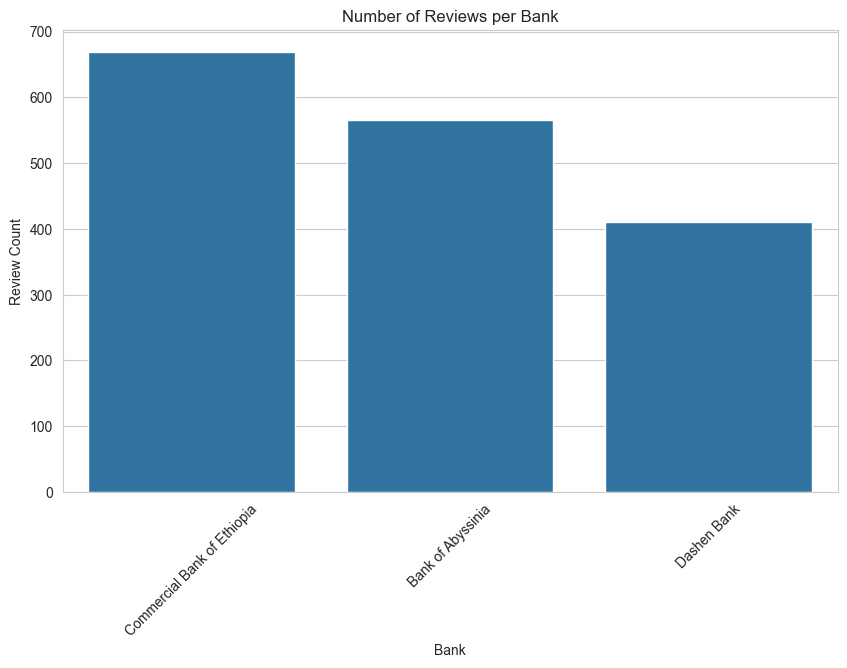


Rating Distribution:
rating
1    585
2    116
3    114
4    127
5    703
Name: count, dtype: int64


C:\Users\derej\AppData\Local\Temp\ipykernel_178328\103604710.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


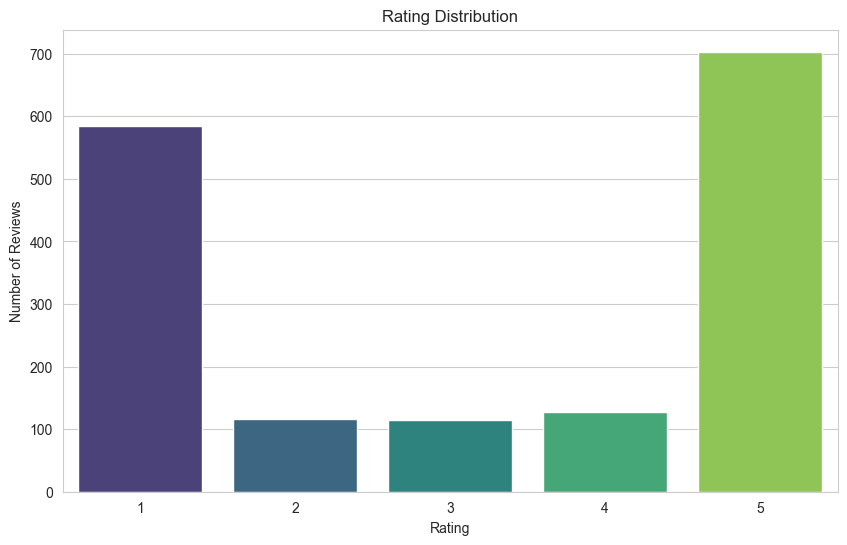


Review Text Length Stats:
count    1645.000000
mean      106.124620
std       104.474812
min        21.000000
25%        37.000000
50%        67.000000
75%       131.000000
max       500.000000
Name: text_length, dtype: float64


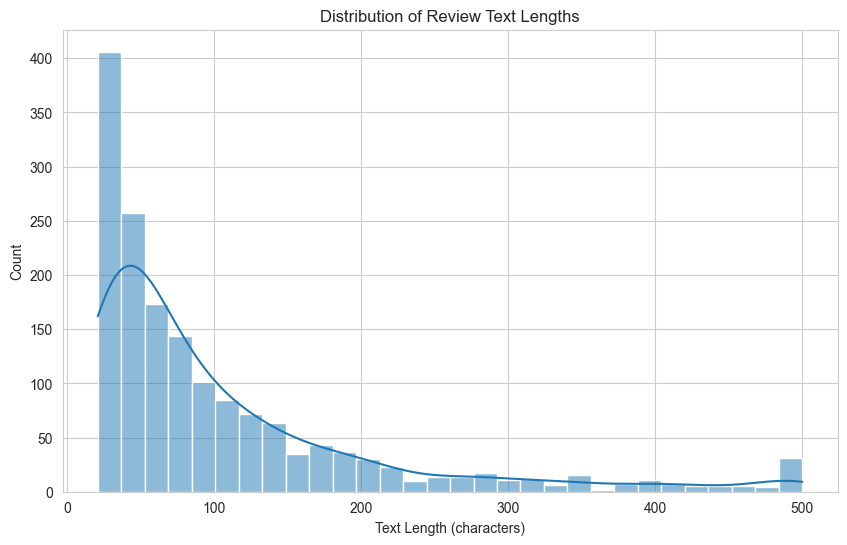

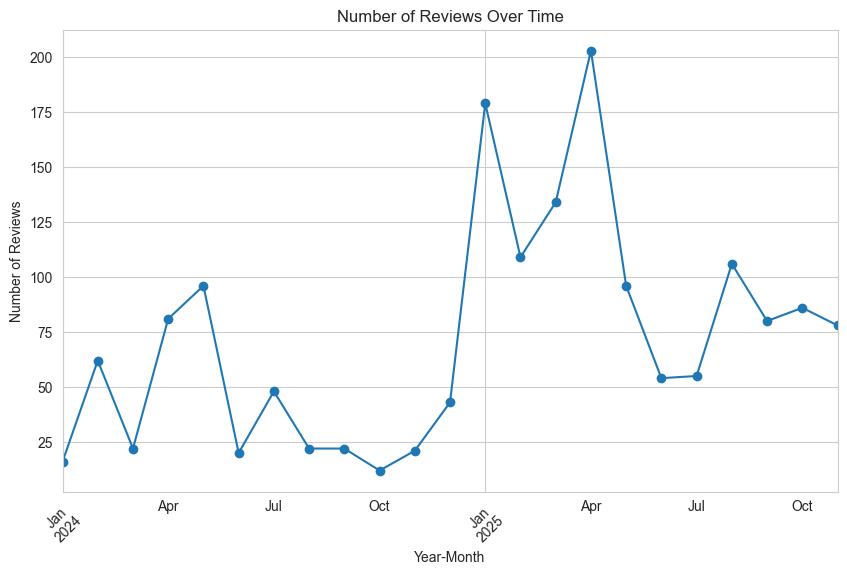

In [1]:
# ======================================
# EDA Notebook for Bank Reviews Analysis
# ======================================

# ===============================
# 1️⃣ Import Libraries
# ===============================
import sys
import os

# Get project root (one folder up from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add project root to sys.path so we can import configs
sys.path.append(project_root)

# Import configs
from configs.config import DATA_PATHS

# Data analysis & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ===============================
# 2️⃣ Load Preprocessed Data
# ===============================

# Build absolute path to processed reviews CSV
processed_path = os.path.join(project_root, DATA_PATHS['processed_reviews'])

# Load the data
df = pd.read_csv(processed_path, parse_dates=['review_date'])
print(f"Loaded {len(df)} reviews from {processed_path}\n")

# Quick glance at data
df.head()

# ===============================
# 3️⃣ Basic Info & Summary
# ===============================
print("Data Info:")
print(df.info())

print("\nData Description:")
print(df.describe(include='all'))

# ===============================
# 4️⃣ Missing Values Check
# ===============================
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
print("\nMissing Values Summary:")
print(missing_df)

# ===============================
# 5️⃣ Reviews per Bank
# ===============================
bank_counts = df['bank_name'].value_counts()
print("\nReviews per Bank:")
print(bank_counts)

# Bar plot
sns.barplot(x=bank_counts.index, y=bank_counts.values)
plt.title("Number of Reviews per Bank")
plt.ylabel("Review Count")
plt.xlabel("Bank")
plt.xticks(rotation=45)
plt.show()

# ===============================
# 6️⃣ Rating Distribution
# ===============================
rating_counts = df['rating'].value_counts().sort_index()
print("\nRating Distribution:")
print(rating_counts)

# Bar plot
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

# ===============================
# 7️⃣ Review Text Length Analysis
# ===============================
print("\nReview Text Length Stats:")
print(df['text_length'].describe())

# Histogram
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Count")
plt.show()

# ===============================
# 8️⃣ Reviews Over Time
# ===============================
# Group by month-year
df['year_month'] = df['review_date'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()

# Line plot
monthly_counts.plot(marker='o')
plt.title("Number of Reviews Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()


Average Rating per Bank:
bank_name
Dashen Bank                    4.051220
Commercial Bank of Ethiopia    3.370703
Bank of Abyssinia              2.236749
Name: rating, dtype: float64


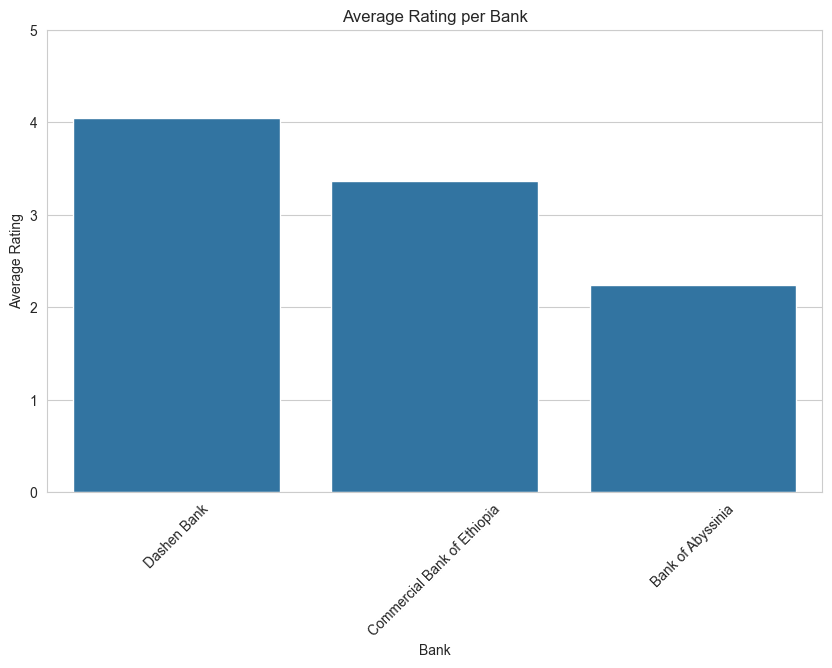

In [2]:

# ===============================
# 7A️⃣ Average Rating per Bank
# ===============================

avg_rating_per_bank = df.groupby('bank_name')['rating'].mean().sort_values(ascending=False)
print("Average Rating per Bank:")
print(avg_rating_per_bank)

sns.barplot(x=avg_rating_per_bank.index, y=avg_rating_per_bank.values)
plt.title("Average Rating per Bank")
plt.ylabel("Average Rating")
plt.xlabel("Bank")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()


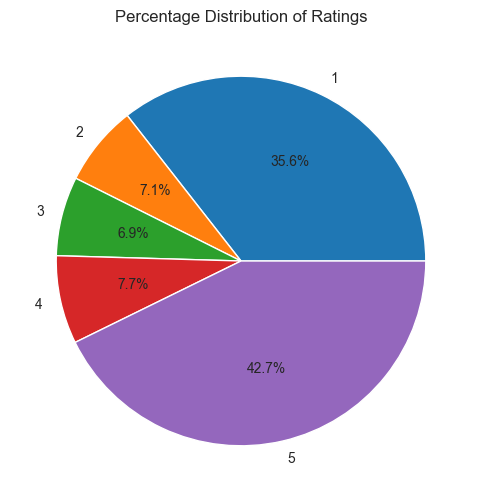

In [3]:
# ===============================
# 6A️⃣ Rating Category Percentage
# ===============================
rating_percentage = (rating_counts / rating_counts.sum()) * 100
rating_percentage

plt.pie(rating_percentage, labels=rating_percentage.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Ratings")
plt.show()


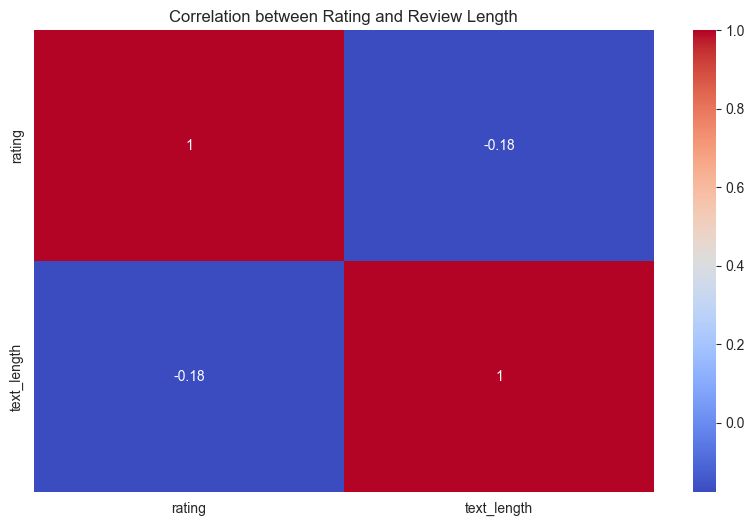

In [4]:
# ===============================
# 8A️⃣ Correlation Heatmap
# ===============================
corr = df[['rating', 'text_length']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Rating and Review Length")
plt.show()
